# AI in Full Bloom: Classifying Iris Flowers with Code

After the workshop, you must be wondering how **you** could be making your own AIs and using them to solve problems you care about. Fear not! As I, Isita, have prepared this *lovely*, if I do say so myself,  Google Collab Notebook, with a tutorial for an Artificial Neural Network and Decision Tree Classifier. This code will be used on a public dataset of Irises, as it is a simple dataset to use for beginners. With your own projects, you can find datasets about other problems, like pollution or energy usage. 

# Let us now Embark on Our Journey!

## The Iris Dataset

Before we get started with using scikit-learn, we need to decide what machine learning task we want to accomplish with it. 

In this workshop, we'll use scikit-learn for Classification using the **Artificial Neural Network** algorithm. We will also be trying the **Decision Tree** algorithm in this notebook. We'll use a popular sample dataset often referred to as "the Iris dataset" that was made specifically for machine learning algorithms([Link to dataset here](https://archive.ics.uci.edu/ml/datasets/Iris))

There are different species of ([Iris](https://en.wikipedia.org/wiki/Iris_(plant))) flowers. Our goal is to train a machine learning system to be able to take a new Iris flower and predict which Iris species it is.

![alt text](https://cdn.pixabay.com/photo/2015/05/26/13/57/flower-784688__340.jpg)

This dataset has:

* 150 examples
* 3 classes: setosa, versicolor, and virginica
* 4 features: sepal length, sepal width, petal length, petal width
* 50 examples for each class

This dataset can be imported directly from Sci-kit Learn, the python module. That way we do not have to upload a huge file.

Let's load this dataset using scikit-learn, which is called `sklearn` in Python.


# Importing and Cleaning Up the Dataset

Here we are importing all the libraries we will need to access functions from and loading the dataset.

In [1]:
import os
import pandas as pd # loading data in table form  
import seaborn as sns # visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize # machine learning algorithm library

# Disable CUDA
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import keras #library for neural network

#  Load the dataset, which contains the data points(sepal length, petal length, etc) and corresponding labels(type of iris)
iris_dataset=pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

iris_dataset.loc[iris_dataset["species"] == "setosa", "species"] = 0
iris_dataset.loc[iris_dataset["species"] == "versicolor", "species"] = 1
iris_dataset.loc[iris_dataset["species"] == "virginica", "species"] = 2

print(iris_dataset)

     sepal_length  sepal_width  petal_length  petal_width species
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


## Visualizing the Data

To get a sense of how our data is distributed, we can plot our data based on the different features, such as Sepal Length, Petal Width, etc. Based on the graphs, we can also see what the general characterisitics of each type of iris are.

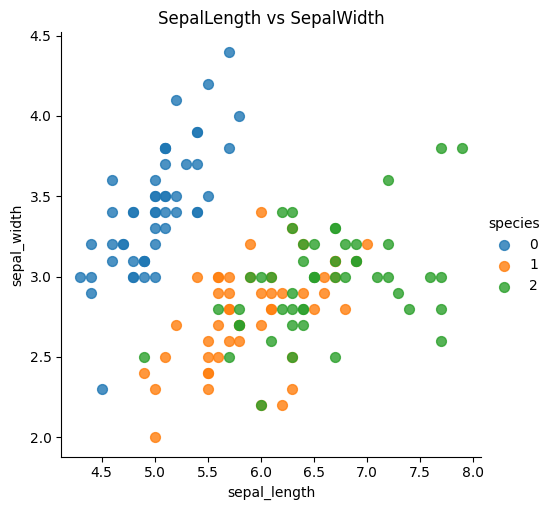

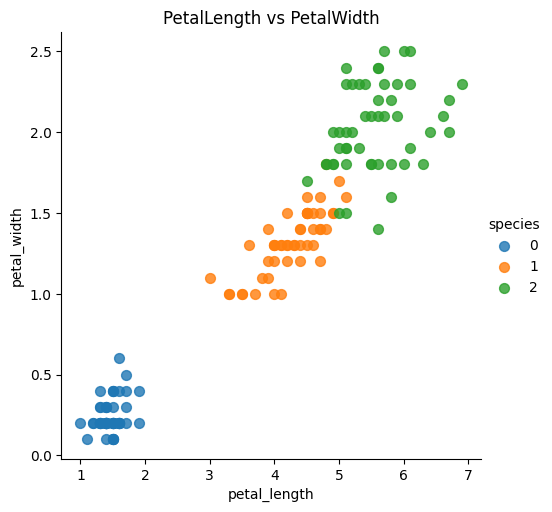

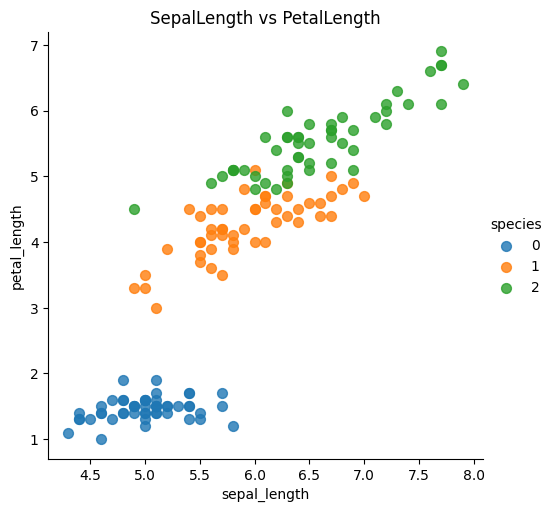

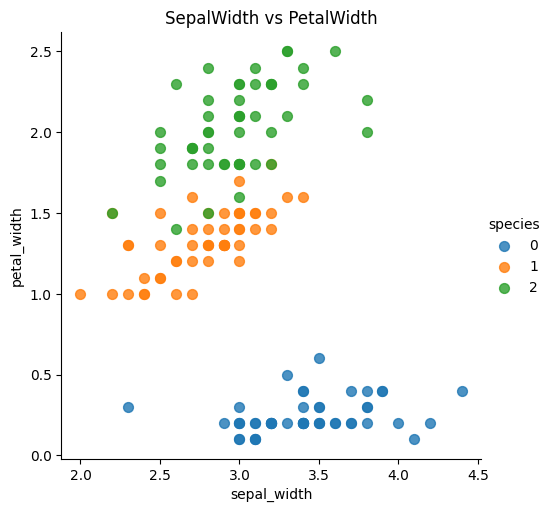

In [2]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width',
           data = iris_dataset,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot(x = 'petal_length', y = 'petal_width',
           data = iris_dataset,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot(x = 'sepal_length', y = 'petal_length',
           data = iris_dataset,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot(x = 'sepal_width', y = 'petal_width',
           data = iris_dataset,
           fit_reg = False,
           hue = "species",
           scatter_kws = {"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

Notice that each species cluster is in a somewhat distinct section of the graph. From this we find general parameters to guess the type of iris ourself. Example: If my flower has a small Sepal Length and a Small Petal Length what type might it be?(Look at the graphs)

Answer: It's proabaly species 0 or 'Setosa' because in the second graph, Sepal Length' versus 'Petal Length', the blue dots are clustered near the origin.

## ANN: Splitting up the training and test sets

Remember that in ANN classification,  a type of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.

The first step that we'll do is break up the Iris dataset into training set and test set:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras.utils import np_utils


# Break the dataset up into the examples (X) and their labels (y)
x = iris_dataset.iloc[:, 0:4].values

# print(f'{X}\n')
# print(f'{X.shape}')

In [4]:
y = iris_dataset.iloc[:, 4].values

# print(f'{y}\n')
# print(f'{y.shape}')

In [5]:
X = normalize(x, axis=0)

# print(f'{X}\n')
# print(f'{X.shape}')

In [6]:
# Split up the X and y datasets randomly into train and test sets
# 20% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 31)

#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train = np_utils.to_categorical(y_train,num_classes = 3)
y_test = np_utils.to_categorical(y_test,num_classes = 3)

#print(f'{y_train}\n')
#print(f'{y_test}')

Our training set contains all of the correct targets (classes) for our flower examples, along with the four features of each flower. We'll need all of this information to teach our classifier how to predict a class given a new set of four features.

**Note: Because the data points are split randomly into train and test, each run might not be the same**

## ANN: Building our Network

Now that we've split our data into a training and test set, it's time to build our ANN.

As you may already know Neural Networks look like this:


![alt text](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)


 Here we create the Neural Newtork Framework, with how many layers, activation functions, etc. You can experiment with the numbers as much as you want, but you might want to research "activation functions" before changing those. 

 We choose most of the parameters, except for the weights associated with each node. Those weights are learned by the netwrok thorugh training later on.

In [7]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(1000, input_dim = 4,activation = 'relu'))
model.add(Dense(50, activation = 'relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(3, activation = 'softmax'))

# Compiling the ANN
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


## ANN: Training our Network

We have built the Neural Network and now we need to train it with our training data. The training process adjusts the weights of the nodes to match the relations between the features and labels of the training set.

In [8]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 20, epochs = 10, verbose = 1)

Epoch 1/10
6/6 [==============================] - 1s 62ms/step - loss: 1.0940 - accuracy: 0.2583 - val_loss: 1.0861 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 1.0810 - accuracy: 0.3917 - val_loss: 1.0758 - val_accuracy: 0.5333
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 1.0674 - accuracy: 0.5917 - val_loss: 1.0623 - val_accuracy: 0.5333
Epoch 4/10
6/6 [==============================] - 0s 38ms/step - loss: 1.0594 - accuracy: 0.5917 - val_loss: 1.0481 - val_accuracy: 0.6000
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 1.0350 - accuracy: 0.6583 - val_loss: 1.0296 - val_accuracy: 0.5667
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 1.0162 - accuracy: 0.6500 - val_loss: 1.0072 - val_accuracy: 0.6000
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.9813 - accuracy: 0.6833 - val_loss: 0.9784 - val_accuracy: 0.6000
Epoch 8/10
6/6 [===========

## ANN: Prediction Accuracy

Now let's predict some values using the ANN we just created and trained. We will use the Neural Network Structure, which has been trained and assigned weights on the nodes based on the patterns in the training data, to predict the results of the datapoints in the test set.

In [9]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

prediction = model.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis = 1)
predict_label = np.argmax(prediction, axis = 1)
#how times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label) / length * 100 
print("Accuracy of the dataset", accuracy )

1/1 [==============================] - 0s 27ms/step
Accuracy of the dataset 60.0


## ANN: Tuning the Parameters

Artificial Neural Networks have many different places to experiment. The Neural Network Structure can be altered and has a significant impact on the performance. Hidden Layers can be added or delete and many different values can be put in. You can also change the training parameters  such as, epoch number, batch size, and other inputs to see what brings out the best accuracy.  

Tuning both structural and training parameters is an essential step in developing a neural network based soultion for any problem.

While this variability of parameters makes it so that ANN's can be tuned to high degrees of perfection, finding the same patterns that ANNs discern and understanding it's choices is hard for humans. **Sometimes** AI is called a ["Black Box Technique"](https://towardsdatascience.com/machine-learning-how-black-is-this-black-box-f11e4031fdf)

---
Let's try adding a second hidden layer and see if it improves our accuracy.

In [10]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout 


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(1000, input_dim = 4, activation = 'relu'))

#Changing number of nodes in first hidden layer
model.add(Dense(50, activation = 'relu'))

# Adding the second hidden layer
model.add(Dense(300, activation = 'relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(3, activation = 'softmax'))

# Compiling the ANN
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 20, epochs = 10, verbose = 1)

Epoch 1/10
6/6 [==============================] - 1s 50ms/step - loss: 1.0966 - accuracy: 0.3083 - val_loss: 1.0874 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 0s 12ms/step - loss: 1.0827 - accuracy: 0.4083 - val_loss: 1.0718 - val_accuracy: 0.4000
Epoch 3/10
6/6 [==============================] - 0s 11ms/step - loss: 1.0587 - accuracy: 0.6250 - val_loss: 1.0400 - val_accuracy: 0.5667
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 1.0186 - accuracy: 0.6833 - val_loss: 0.9868 - val_accuracy: 0.6000
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.9480 - accuracy: 0.6833 - val_loss: 0.9138 - val_accuracy: 0.6000
Epoch 6/10
6/6 [==============================] - 0s 13ms/step - loss: 0.8580 - accuracy: 0.6833 - val_loss: 0.8197 - val_accuracy: 0.6000
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.7486 - accuracy: 0.6833 - val_loss: 0.7131 - val_accuracy: 0.6000
Epoch 8/10
6/6 [===========

In [11]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 107ms/step


(30, 3)

In [12]:
y_pred = (y_pred > 0.5)
y_pred.shape

(30, 3)

In [13]:
prediction = model.predict(X_test)
length = len(prediction)

y_label = np.argmax(y_test, axis = 1)
predict_label = np.argmax(prediction,axis = 1)

# How times it matched/ how many test cases
accuracy = np.sum(y_label == predict_label) / length * 100 
print("Accuracy of the dataset", accuracy )

1/1 [==============================] - 0s 31ms/step
Accuracy of the dataset 93.33333333333333


## Inspect Testing Proces

Read the output of the testing

In [14]:
print(f'{X_test}\n')
print(f'{X_test.shape}')

[[0.07748055 0.07941484 0.0885422  0.08627246]
 [0.0885492  0.07412052 0.11018585 0.12653294]
 [0.06364474 0.08470916 0.02754646 0.01150299]
 [0.07886413 0.07676768 0.08263939 0.07476947]
 [0.09408352 0.07941484 0.10821824 0.12078145]
 [0.0664119  0.07941484 0.02754646 0.01725449]
 [0.08716562 0.07147336 0.09641262 0.10352695]
 [0.07886413 0.07941484 0.08263939 0.06901797]
 [0.07886413 0.1164751  0.02951407 0.02300599]
 [0.07056264 0.09794497 0.02951407 0.02300599]
 [0.08439845 0.06882619 0.11018585 0.08052096]
 [0.08301487 0.09000348 0.0885422  0.09202396]
 [0.08301487 0.07941484 0.09444501 0.10352695]
 [0.05949399 0.07941484 0.02164365 0.0057515 ]
 [0.10653575 0.10059213 0.1318295  0.12653294]
 [0.08301487 0.07147336 0.10034783 0.09202396]
 [0.08716562 0.06617903 0.09641262 0.08627246]
 [0.08301487 0.07676768 0.0885422  0.08627246]
 [0.08024771 0.07412052 0.10034783 0.13803594]
 [0.06087757 0.07676768 0.02754646 0.01150299]
 [0.0885492  0.08470916 0.10428304 0.13228444]
 [0.08716562 

In [15]:
test_pred = model.predict(X_test)

print(f'{test_pred}\n')
print(f'{test_pred.shape}')

1/1 [==============================] - 0s 33ms/step
[[1.6069241e-02 5.1426572e-01 4.6966502e-01]
 [7.2036625e-04 2.4230704e-01 7.5697261e-01]
 [9.4838011e-01 4.0628359e-02 1.0991486e-02]
 [3.5562515e-02 5.7601827e-01 3.8841921e-01]
 [1.1125517e-03 2.7895463e-01 7.1993279e-01]
 [9.3405354e-01 5.1919248e-02 1.4027161e-02]
 [3.9638099e-03 3.8397238e-01 6.1206383e-01]
 [5.0389469e-02 5.9675473e-01 3.5285571e-01]
 [9.4570899e-01 4.3431424e-02 1.0859687e-02]
 [9.3046767e-01 5.5155046e-02 1.4377224e-02]
 [6.9550923e-03 4.3802559e-01 5.5501938e-01]
 [1.3939999e-02 5.0799066e-01 4.7806925e-01]
 [5.0171209e-03 4.0792584e-01 5.8705699e-01]
 [9.4932014e-01 3.9747007e-02 1.0932777e-02]
 [4.1222057e-04 2.1916322e-01 7.8042454e-01]
 [6.1523076e-03 4.2514548e-01 5.6870222e-01]
 [8.7105855e-03 4.5721617e-01 5.3407323e-01]
 [1.4932938e-02 5.0865161e-01 4.7641546e-01]
 [6.3408213e-04 2.2968194e-01 7.6968390e-01]
 [9.4451249e-01 4.3523047e-02 1.1964542e-02]
 [8.2070049e-04 2.5482419e-01 7.4435514e-01]
 [2

In [16]:
length = len(test_pred)
length

30

In [17]:
y_label = np.argmax(y_test, axis=1)
y_label

array([1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 1])

In [18]:
predict_label=np.argmax(test_pred, axis=1)
predict_label

array([1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 1])

In [19]:
accuracy = np.sum(y_label == predict_label) / length * 100 
print("Accuracy of the dataset", accuracy )

Accuracy of the dataset 93.33333333333333


## Use Custom Input Data

Use custom data as input to predict

In [20]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
custom = np.array([[6.2, 3.4, 5.4, 2.3], [6.2, 3.4, 5.4, 2.3], [6.2, 3.4, 5.4, 2.3]])
custom

array([[6.2, 3.4, 5.4, 2.3],
       [6.2, 3.4, 5.4, 2.3],
       [6.2, 3.4, 5.4, 2.3]])

In [24]:
custom_normalized = normalize(np.concatenate([x, custom]), axis=1)
custom_normalized = np.array(custom_normalized[-3:,:])
custom_normalized

array([[0.67467072, 0.36998072, 0.58761643, 0.25028107],
       [0.67467072, 0.36998072, 0.58761643, 0.25028107],
       [0.67467072, 0.36998072, 0.58761643, 0.25028107]])

In [25]:
test_pred = model.predict(custom_normalized)
test_pred

1/1 [==============================] - 0s 29ms/step


array([[3.3535490e-13, 8.6933345e-04, 9.9913067e-01],
       [3.3535490e-13, 8.6933345e-04, 9.9913067e-01],
       [3.3535490e-13, 8.6933345e-04, 9.9913067e-01]], dtype=float32)

In [30]:
predict_label = np.argmax(test_pred,axis=1)
print(f"The input is {custom}")
print(f"The result is {predict_label.tolist()}")

The input is [[6.2 3.4 5.4 2.3]
 [6.2 3.4 5.4 2.3]
 [6.2 3.4 5.4 2.3]]
The result is [2, 2, 2]


# That's all Folks!

Thank you so much for going through this tutorial. I am confident you will now be able to use AI to change the world and save our planet!

If you have any more questions email me at : isitatalukdar@gmail.com